# Preparing Twitter WeRateDogs data for analysis

## Gather

In [402]:
import pandas as pd
import requests
import tweepy
import json
from openpyxl.workbook import Workbook 
import numpy as np
import matplotlib.pyplot as plt

In [269]:
# Gathering Twitter archive data
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [270]:
# Downloading tweet image predictions

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

if response.status_code == 200:
    with open('image-predictions.tsv', 'wb') as file:
        file.write(response.content)
        print("File downloaded successfully.")
else:
    print("Error downloading file.")


File downloaded successfully.


In [271]:
# Gathering image predictions data

image_predict = pd.read_csv('image-predictions.tsv', sep='\t')

In [272]:
# Access Twitter API

# Unfortunately access to Twitter API hasn`t worked for me due to 401 Authentification problems. I tried hard but didn´t get the access runing.

In [273]:
# Reading JSON Data

data = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        data.append(json.loads(line))



In [274]:
# Converting JSON data into pandas DataFrame

tw_data = pd.DataFrame(data)

## Assess

In [275]:
tw_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1643,683857920510050305,NaN,NaN,2016-01-04 03:50:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sadie. She fell asleep on the beach and h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683857920...,10,10,Sadie,None,None,None,None
1865,675354435921575936,NaN,NaN,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Everyone needs to watch this. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None
415,822647212903690241,NaN,NaN,2017-01-21 03:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Paisley. She really wan...,8.224891e+17,4.196984e+09,2017-01-20 17:00:46 +0000,https://twitter.com/dog_rates/status/822489057...,13,10,Paisley,None,None,None,None
1722,680115823365742593,NaN,NaN,2015-12-24 20:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzy. He woke up 2 minutes before he h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680115823...,9,10,Ozzy,None,None,None,None
1463,694669722378485760,NaN,NaN,2016-02-02 23:52:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. He's an important dog. Can contr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None


In [276]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [277]:
tw_archive.name.sample(20)

510              Moe
644             Newt
1749            None
194           George
460             Dido
1576          Kramer
1077            None
508             None
1260            None
2017           Bubba
1076           Benji
376           Sailer
255            Margo
1916            life
758             None
976              Jax
1770            None
2243    Cleopatricia
1134         Coleman
1580          Gordon
Name: name, dtype: object

In [278]:
image_predict.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [279]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [280]:
tw_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [281]:
# Export as Excel file for visual assessment 
tw_data.to_excel('tw_data.xlsx', index=False)
tw_archive.to_excel('tw_archive.xlsx', index=False)

In [282]:
tw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

#### Tidiness:
* tweet informations are separated in 3 table and should combined first
* The doggo, floffer, pupper and puppo column in the `tw_archive`table should be combined to one column because they all belong to the same categorie


#### Quality:

##### `tw_archive` table
* Where are only 2075 image pretictions but 2356 tweets in the tw_archive table
* timestamp column do not have the appropriate data type 
* Some dog names are missing or just with a character (index 1193, a)
* Some dogs are not categorized
* Inconstensy of spelling dog_stages categories 
* The values in the columns in_reply_to_status_id is not displayed correct (4.196984e+09)

##### `tw_data` table
* tweet_id as identifyer does not have the same column name in all tables
* Not all columns are needed. For overview reason shorten column to the minimum

## Clean

In [283]:
# Make copy of the tables for cleaning purposes

tw_archive_clean = tw_archive.copy()
image_predict_clean = image_predict.copy()
tw_data_clean = tw_data.copy()

### Tidiness

#### `tw_archive`: The doggo, floffer, pupper and puppo column in the `tw_archive`table should be combined to one column because they all belong to the same categorien

#### Define  
Transform the floffer, pupper and puppo column to a single column 

#### Code

In [284]:
tw_archive_clean['dog_stages'] = (tw_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace("None","").apply(lambda x: " ".join(x), axis=1).str.strip())

In [285]:
tw_archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

In [286]:
tw_archive_clean.query("dog_stages != ''").head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo


#### Test

In [287]:
tw_archive_clean.dog_stages.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo  pupper      12
floofer             9
doggo   puppo       1
doggo floofer       1
Name: dog_stages, dtype: int64

In [288]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stages                  2356 

#### Tweet informations are separated in `3 table` and should combined

#### Define

Merge all three tables on tweet_id as identifyer and rename the column 'id' in 'tweet_id' from table `tw_data` before the operation

#### Code

In [289]:
# rename column 
tw_data_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

# merge tables
tw_master = pd.merge(pd.merge(tw_archive_clean, tw_data_clean, on='tweet_id'), image_predict_clean, on='tweet_id')

#### Test

In [290]:
tw_master.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [291]:
tw_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2073 non-null   int64  
 1   in_reply_to_status_id_x        23 non-null     float64
 2   in_reply_to_user_id_x          23 non-null     float64
 3   timestamp                      2073 non-null   object 
 4   source_x                       2073 non-null   object 
 5   text                           2073 non-null   object 
 6   retweeted_status_id            79 non-null     float64
 7   retweeted_status_user_id       79 non-null     float64
 8   retweeted_status_timestamp     79 non-null     object 
 9   expanded_urls                  2073 non-null   object 
 10  rating_numerator               2073 non-null   int64  
 11  rating_denominator             2073 non-null   int64  
 12  name                           2073 non-null   o

#### `tw_archive`:  Where are only 2075 image predictions but 2356 tweets in the tw_archive table

#### Define

Drop tweets that don´t have an image prediction. 

#### Code

Task should be already done by merging all 3 tables in the tidiness cleaning issue. Verification is done in the following testing section.

#### Test

In [293]:
# Testing if img_num column is null in the column
tw_master.query('img_num == 0').any().sum()

0

In [294]:
# Checking if tweet_id and img_num have the same amount of values
tw_master[['tweet_id', 'img_num']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2073 non-null   int64
 1   img_num   2073 non-null   int64
dtypes: int64(2)
memory usage: 48.6 KB


#### `tw_data`: Not all columns are needed. For overview reason shorten column to the minimum

#### Define

Mimimize dataset to the following columns: Mimimize dataset to the following columns: 'tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'dog_stages', 'jpg_url', 'img_num', 'p1', 'p1_conf','p1_dog','retweet_count', 'favorite_count', 'favorited',	'retweeted'

#### Code

In [295]:
tw_master_clean = tw_master[['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'dog_stages', 'jpg_url', 'img_num', 'p1', 'p1_conf','p1_dog','retweet_count', 'favorite_count', 'favorited','retweeted', 'in_reply_to_user_id_y', 'expanded_urls' ]]

#### Test

In [296]:
tw_master_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,favorited,retweeted,in_reply_to_user_id_y,expanded_urls
246,835297930240217089,2017-02-25 01:18:40 +0000,Meet Ash. He's a Benebop Cumberplop. Quite rar...,12,10,Ash,,https://pbs.twimg.com/media/C5eTCOVUsAAWhvc.jpg,1,Rottweiler,0.341276,True,3381,17847,False,False,NaN,https://twitter.com/dog_rates/status/835297930...
1138,703382836347330562,2016-02-27 00:55:11 +0000,This is Charlie. He's a West Side Niddlewog. M...,12,10,Charlie,,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg,2,golden_retriever,0.945664,True,1285,3837,False,False,NaN,https://twitter.com/dog_rates/status/703382836...
1220,695816827381944320,2016-02-06 03:50:33 +0000,Here's a dog enjoying a sunset. 11/10 would tr...,11,10,None,,https://pbs.twimg.com/media/CagJtjYW8AADoHu.jpg,1,Pomeranian,0.382234,True,1320,3287,False,False,NaN,https://twitter.com/dog_rates/status/695816827...
1113,705591895322394625,2016-03-04 03:13:11 +0000,"""Ma'am, for the last time, I'm not authorized ...",11,10,None,,https://pbs.twimg.com/media/CcrEFQdUcAA7CJf.jpg,1,basenji,0.877207,True,1308,3475,False,False,NaN,https://twitter.com/dog_rates/status/705591895...
369,817415592588222464,2017-01-06 17:00:38 +0000,Meet Strudel. He's rather h*ckin pupset that y...,11,10,Strudel,,https://pbs.twimg.com/media/C1gLJVpWgAApI3r.jpg,1,Doberman,0.806163,True,1131,6267,False,False,NaN,https://www.gofundme.com/help-strudel-walk-aga...


In [297]:
tw_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2073 non-null   int64  
 1   timestamp              2073 non-null   object 
 2   text                   2073 non-null   object 
 3   rating_numerator       2073 non-null   int64  
 4   rating_denominator     2073 non-null   int64  
 5   name                   2073 non-null   object 
 6   dog_stages             2073 non-null   object 
 7   jpg_url                2073 non-null   object 
 8   img_num                2073 non-null   int64  
 9   p1                     2073 non-null   object 
 10  p1_conf                2073 non-null   float64
 11  p1_dog                 2073 non-null   bool   
 12  retweet_count          2073 non-null   int64  
 13  favorite_count         2073 non-null   int64  
 14  favorited              2073 non-null   bool   
 15  retw

#### `tw_archive` : timestamp column do not have the appropriate data type

#### Define

Change timestamp datatype from object to datetime

#### Code

In [298]:
tw_master_clean['timestamp'] = pd.to_datetime(tw_master_clean['timestamp'])

/tmp/ipykernel_579400/2328002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_master_clean['timestamp'] = pd.to_datetime(tw_master_clean['timestamp'])


#### Test

In [299]:
tw_master_clean.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2073 entries, 0 to 2072
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2073 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 32.4 KB


In [365]:
tw_master_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,favorited,retweeted,in_reply_to_user_id,expanded_urls
651,772114945936949249,2016-09-03 16:52:02+00:00,This is Finn. He's very nervous for the game. ...,10,10,Finn,unknown,https://pbs.twimg.com/media/Crcacf9WgAEcrMh.jpg,1,Chihuahua,1,True,546,3005,False,False,NaN,https://twitter.com/dog_rates/status/772114945...
1054,710117014656950272,2016-03-16 14:54:24+00:00,This pupper got her hair chalked for her birth...,11,10,None,pupper,https://pbs.twimg.com/media/CdrXp9dWoAAcRfn.jpg,2,toy_poodle,1,True,2233,5999,False,False,NaN,https://twitter.com/dog_rates/status/710117014...
645,772826264096874500,2016-09-05 15:58:34+00:00,Meet Roosevelt. He's preparing for takeoff. Ma...,11,10,Roosevelt,unknown,https://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg,1,basset,1,True,2669,8842,False,False,NaN,https://twitter.com/dog_rates/status/772826264...
1122,704859558691414016,2016-03-02 02:43:09+00:00,Here is a heartbreaking scene of an incredible...,10,10,unknown,pupper,https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg,1,pug,0,True,612,2462,False,False,NaN,https://twitter.com/dog_rates/status/704859558...
1947,668248472370458624,2015-11-22 02:03:45+00:00,Say hello to Bisquick. He is a Brown Douglass ...,8,10,Bisquick,unknown,https://pbs.twimg.com/media/CUYYcMfXAAAixe7.jpg,1,Chihuahua,1,True,523,1056,False,False,NaN,https://twitter.com/dog_rates/status/668248472...


#### `tw_archive`: Some dog names are missing or just with a character (index 1193, a)

#### Define

Identify all names with an 'a', replace them with NaN values and change NaN values to 'unknown'.

#### Code

In [301]:
mask = tw_master_clean['name'] == 'a'
tw_master_clean.loc[mask, 'name'] = np.nan
tw_master_clean['name'].fillna('unknown', inplace=True)

/tmp/ipykernel_579400/1656890646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_master_clean['name'].fillna('unknown', inplace=True)


#### Test

In [302]:
tw_master_clean.query("name == 'a'")

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,favorited,retweeted,in_reply_to_user_id_y,expanded_urls


#### `tw_data`: Some dogs are not categorized

#### Define

Identify all rows with missing dog_stages and fill them with 'unknown'.

#### Code

In [303]:
tw_master_clean.loc[tw_master_clean['dog_stages'] == '', 'dog_stages'] = np.nan
tw_master_clean['dog_stages'].fillna('unknown', inplace=True)

/tmp/ipykernel_579400/2509034176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_master_clean['dog_stages'].fillna('unknown', inplace=True)


#### Test

In [304]:
tw_master_clean.dog_stages.value_counts()

unknown          1753
pupper            210
doggo              67
puppo              23
doggo  pupper      11
floofer             7
doggo   puppo       1
doggo floofer       1
Name: dog_stages, dtype: int64

#### `tw_master_clean`: Inconsistency of spelling dog_stages categories

#### Define

Remove 'doggo' term in value 'doggo pupper', 'doggo puppo', 'doggo floofer' with regular expressions

#### Code

In [305]:
# define search pattern
pattern = r'doggo\s+(\w+)'

# replace pattern with second term
tw_master_clean['dog_stages'] = tw_master_clean['dog_stages'].str.replace(pattern, r'\1')

# remove leading and trailing spaces
tw_master_clean['dog_stages'] = tw_master_clean['dog_stages'].str.strip()

/tmp/ipykernel_579400/1665416530.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tw_master_clean['dog_stages'] = tw_master_clean['dog_stages'].str.replace(pattern, r'\1')
/tmp/ipykernel_579400/1665416530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_master_clean['dog_stages'] = tw_master_clean['dog_stages'].str.replace(pattern, r'\1')
/tmp/ipykernel_579400/1665416530.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_master_clean['dog_stages

#### Test

In [306]:
tw_master_clean.dog_stages.value_counts()

unknown    1753
pupper      221
doggo        67
puppo        24
floofer       8
Name: dog_stages, dtype: int64

#### `tw_master_clean`:  Remove 'y' in column name 'in_reply_to_user_id_y'

#### Define

Rename column 'in_reply_to_user_id_y' in 'in_reply_to_user_id' with rename method

#### Code

In [308]:
tw_master_clean.rename(columns = {'in_reply_to_user_id_y': 'in_reply_to_user_id'}, inplace=True)

/tmp/ipykernel_579400/1813233658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_master_clean.rename(columns = {'in_reply_to_user_id_y': 'in_reply_to_user_id'}, inplace=True)


#### Test

In [315]:
tw_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2073 non-null   int64              
 1   timestamp            2073 non-null   datetime64[ns, UTC]
 2   text                 2073 non-null   object             
 3   rating_numerator     2073 non-null   int64              
 4   rating_denominator   2073 non-null   int64              
 5   name                 2073 non-null   object             
 6   dog_stages           2073 non-null   object             
 7   jpg_url              2073 non-null   object             
 8   img_num              2073 non-null   int64              
 9   p1                   2073 non-null   object             
 10  p1_conf              2073 non-null   float64            
 11  p1_dog               2073 non-null   bool               
 12  retweet_count       

#### `tw_master_clean`: The values in the columns in_reply_to_status_id is not displayed correct (4.196984e+09)

#### Define

Format column 'in_reply_to_user_id' as regular numbers without scientific notation

#### Code

In [317]:
# Set the display format
pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))

#### Test

In [318]:
tw_master_clean.in_reply_to_user_id.value_counts()

4196983835    23
Name: in_reply_to_user_id, dtype: int64

## Storing the data

In [319]:
tw_master_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis

#### Insights
1. How high is the share of unknown dog stages?
2. How many likes do tweets have on average?
3. How many retweets does the tweet with the most retweets have?

#### Visualization
Visualize the the amount of dog stages per categorie.

#### How high is the share of unknown names?

In [386]:
tw_master_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,favorited,retweeted,in_reply_to_user_id,expanded_urls
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,unknown,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0,False,8853,39467,False,False,NaN,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0,True,6514,33819,False,False,NaN,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,1,True,4328,25461,False,False,NaN,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0,False,8964,42908,False,False,NaN,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,1,True,9774,41048,False,False,NaN,https://twitter.com/dog_rates/status/891327558...


In [421]:
tw_master_clean.dog_stages.value_counts()

unknown    1753
pupper      221
doggo        67
puppo        24
floofer       8
Name: dog_stages, dtype: int64

In [385]:
# Len total
len_total = len(tw_master_clean)

# len unknown
len_unknown = len(tw_master_clean.query("dog_stages == 'unknown'"))

# calculate proportaion of unknown dog stages
unknown_prop = round(len_unknown / len_total * 100,2)

# print result
print('The share of unknown dog names in the database is:', unknown_prop,'%.')

The share of unknown dog names in the database is: 84.56 %.


#### How many likes do tweets have on average?

In [387]:
tw_master_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,retweet_count,favorite_count,in_reply_to_user_id
count,2073,2073,2073,2073,2073,2073,2073,23
mean,738363415646003584,12,11,1,1,2976,8557,4196983835
std,67801180628485048,41,7,1,0,5055,12099,0
min,666020888022790144,0,2,1,0,16,0,4196983835
25%,676470639084101632,10,10,1,0,634,1674,4196983835
50%,711968124745228288,11,10,1,1,1408,3864,4196983835
75%,793195938047070208,12,10,1,1,3443,10937,4196983835
max,892420643555336192,1776,170,4,1,79515,132810,4196983835


In [398]:
# calculate the mean of favorite_count
favorite_mean = round(tw_master_clean.favorite_count.mean(), )

# print results
print('The tweets do have',favorite_mean,'on average.' )

The tweets do have 8557 on average.


#### How many retweets does the tweet with the most retweets have?

In [400]:
# calculate the maximum retweet_count
retweet_max = tw_master_clean.retweet_count.max()

# print results
print('The tweet with the most retweets has',retweet_max,'retweets.' )

The tweet with the most retweets has 79515 retweets.


#### Visualize the the amount of dog stages per categorie

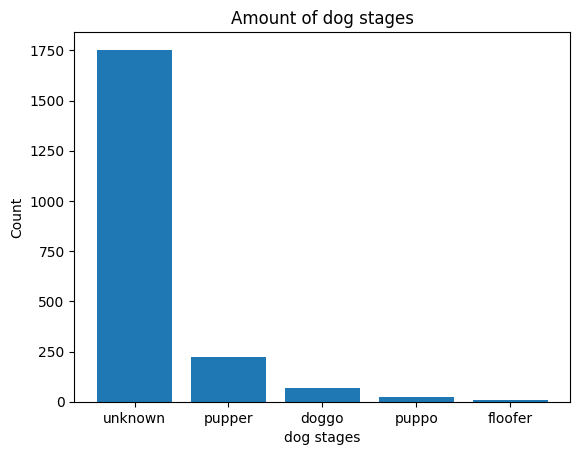

In [418]:
value_counts = tw_master_clean['dog_stages'].value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('dog stages')
plt.ylabel('Count')
plt.title('Amount of dog stages')
plt.show()